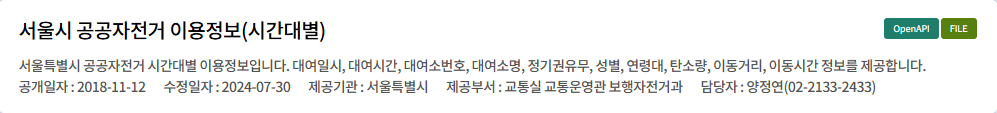
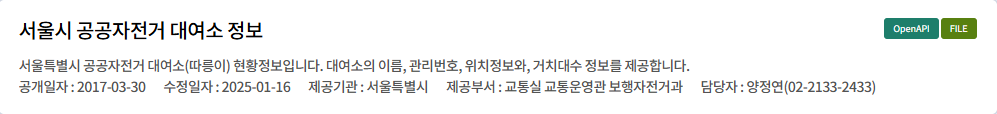
![대여소별 이용정보.png](<attachment:대여소별 이용정보.png>)
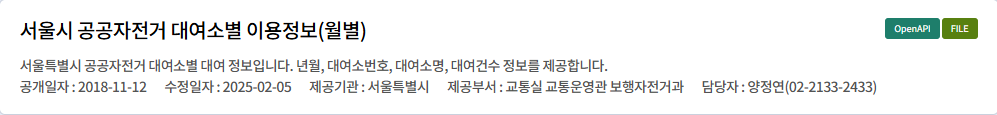

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 한글폰트
# plt.rcParams["font.family"] = "Malgun Gothic"
# # - 요소 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter("ignore")

In [38]:
bike_df = pd.read_excel("./resources/자전거대여소 정보.xlsx", skiprows=4,sheet_name="대여소현황")
bike_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


In [19]:
bike_use_df = pd.read_csv("./resources/자전거대여소별 이용정보.csv", encoding="cp949")
bike_use_df

,자치구,대여소명,기준년월,대여건수,반납건수
0,마포구,108. 서교동 사거리,202407,1597,1609
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698
3,양천구,732. 신월중학교,202407,865,865
4,양천구,733. 신정이펜하우스314동,202407,587,401
...,...,...,...,...,...
13665,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202411,1283,1367
13666,양천구,723. SBS방송국,202411,1930,2092
13667,양천구,724. 계남공원 입구 주출입구 좌측,202411,300,218
13668,양천구,725. 양강중학교앞 교차로,202411,356,279


In [17]:
bike_time_df = pd.read_csv("./resources/자전거시간대별 이용정보.csv", encoding="cp949")
bike_time_df

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35
...,...,...,...,...,...,...,...,...,...,...,...,...
2126128,2024-12-31,23,2547,2547. 반포래미안 리오센트,정기권,M,기타,1,143.46,1.05,4528.32,68
2126129,2024-12-31,23,3680,3680. 강동역3번출구,정기권,M,기타,1,0.00,0.00,0.00,2
2126130,2024-12-31,23,240,240. 문래역 4번출구 앞,정기권,M,기타,1,18.28,0.16,710.00,9
2126131,2024-12-31,23,5773,5773. 송파시그니처롯데캐슬,정기권,M,기타,1,39.75,0.36,1544.25,18


In [ ]:
bike_df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [39]:
bike_df.columns=['대여소번호','대여소명','자치구','상세주소','위도','경도','설치시기','LCD거치대수','QR거치대수','운영방식']
bike_df.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978333,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100,2015-10-07 12:09:09,11.0,11.0,QR


#### 데이터 탐색
    - info()
    - describe()
    - shape

In [25]:
bike_df.shape

(2766, 10)

In [27]:
bike_use_df.shape

(13670, 5)

In [30]:
bike_time_df.shape
bike_time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126133 entries, 0 to 2126132
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 194.7+ MB


#### 데이터 전처리
 - 컬럼명 변경
 - 필요없는 컬럼 제거
 - 데이터 타입 변경

In [40]:
bike_df.drop(columns=["상세주소", "위도","경도"],inplace=True)
bike_df.head()

,대여소번호,대여소명,자치구,설치시기,LCD거치대수,QR거치대수,운영방식
0,301,경복궁역 7번출구 앞,종로구,2015-10-07 12:03:46,20.0,20.0,QR
1,302,경복궁역 4번출구 뒤,종로구,2015-10-07 12:04:22,12.0,12.0,QR
2,303,광화문역 1번출구 앞,종로구,2015-10-07 00:00:00,8.0,8.0,QR
3,305,종로구청 옆,종로구,2015-01-07 00:00:00,16.0,16.0,QR
4,307,서울역사박물관 앞,종로구,2015-10-07 12:09:09,11.0,11.0,QR


In [42]:
# bike_df NaN 처리
# 동일한 값으로 채우기 : fillna()

# isna() or isnull()

# 컬럼별 NaN 개수 확인
bike_df.isnull().sum()

대여소번호         0
대여소명          0
자치구           0
설치시기          0
LCD거치대수    1347
QR거치대수     1078
운영방식          0
dtype: int64

In [45]:
bike_df["LCD거치대수"].fillna(0,inplace=True)
bike_df["QR거치대수"].fillna(0, inplace=True)

In [47]:
bike_df.isnull().sum()

대여소번호      0
대여소명       0
자치구        0
설치시기       0
LCD거치대수    0
QR거치대수     0
운영방식       0
dtype: int64

In [ ]:
bike_df["대여소번호"].dtype

In [49]:
# df 전체 데이터 타입 조회
bike_df.dtypes

대여소번호               int64
대여소명               object
자치구                object
설치시기       datetime64[ns]
LCD거치대수           float64
QR거치대수            float64
운영방식               object
dtype: object

In [50]:
# 타입 변환 - astype(), pd.to_numeric()

bike_df["대여소번호"] = bike_df["대여소번호"].astype(object)

In [51]:
bike_df["대여소번호"].dtype

dtype('O')

In [52]:
# 대여소명 : 숫자, 문자 분리
bike_time_df.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2024-12-01,0,1442,1442. 중랑구청 중화동 별관 앞,정기권,NaN,~10대,1,105.32,0.66,2829.30,18
1,2024-12-01,0,2728,2728.마곡나루역 3번 출구,정기권,NaN,~10대,1,22.45,0.25,1090.00,7
2,2024-12-01,0,1023,1023. 한국종합기술사옥 앞,정기권,NaN,20대,1,148.31,0.87,3745.23,21
3,2024-12-01,0,1150,1150. 송정역 1번출구,정기권,NaN,20대,1,24.01,0.19,808.44,6
4,2024-12-01,0,1260,1260. 방이동 한양3차아파트 옆,정기권,NaN,20대,1,92.85,0.94,4042.55,35


In [59]:
bike_time_df["대여소번호"]=bike_time_df["대여소명"].str.split(".",expand=True)[0]
bike_time_df["대여소명_new"]=bike_time_df["대여소명"].str.split(".",expand=True)[1]

In [65]:
bike_time_df[bike_time_df["대여소명_new"]==None]

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분),대여소명_new


In [75]:
bike_use_df

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,마포구,108. 서교동 사거리,202407,1597,1609,108,서교동 사거리
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113,729,서부식자재마트 건너편
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698,731,서울시 도로환경관리센터
3,양천구,732. 신월중학교,202407,865,865,732,신월중학교
4,양천구,733. 신정이펜하우스314동,202407,587,401,733,신정이펜하우스314동
...,...,...,...,...,...,...,...
13665,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202411,1283,1367,722,경서농협 버스정류장(우리은행신정동지점방향)
13666,양천구,723. SBS방송국,202411,1930,2092,723,SBS방송국
13667,양천구,724. 계남공원 입구 주출입구 좌측,202411,300,218,724,계남공원 입구 주출입구 좌측
13668,양천구,725. 양강중학교앞 교차로,202411,356,279,725,양강중학교앞 교차로


In [68]:
bike_use_df["대여소번호"] = bike_use_df["대여소명"].str.split(".",expand=True)[0]
bike_use_df["대여소명_new"] = bike_use_df["대여소명"].str.split(".",expand=True)[1]

In [84]:
bike_use_df[bike_use_df["대여소명_new"].isnull()]

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new


In [85]:
# 대여소명_new - None 행 제거
# None을 찾을 컬럼 지정 : subset
bike_use_df.dropna(subset="대여소명_new",inplace=True)
bike_use_df

,자치구,대여소명,기준년월,대여건수,반납건수,대여소번호,대여소명_new
0,마포구,108. 서교동 사거리,202407,1597,1609,108,서교동 사거리
1,양천구,729. 서부식자재마트 건너편,202407,1932,2113,729,서부식자재마트 건너편
2,양천구,731. 서울시 도로환경관리센터,202407,3580,3698,731,서울시 도로환경관리센터
3,양천구,732. 신월중학교,202407,865,865,732,신월중학교
4,양천구,733. 신정이펜하우스314동,202407,587,401,733,신정이펜하우스314동
...,...,...,...,...,...,...,...
13665,양천구,722. 경서농협 버스정류장(우리은행신정동지점방향),202411,1283,1367,722,경서농협 버스정류장(우리은행신정동지점방향)
13666,양천구,723. SBS방송국,202411,1930,2092,723,SBS방송국
13667,양천구,724. 계남공원 입구 주출입구 좌측,202411,300,218,724,계남공원 입구 주출입구 좌측
13668,양천구,725. 양강중학교앞 교차로,202411,356,279,725,양강중학교앞 교차로


In [90]:
# 성별 : NaN

# 성별안의 값들은 어떻게 구성되었는가?
bike_time_df["성별"].unique()
bike_time_df["성별"].value_counts()

성별
M    1051039
F     523229
Name: count, dtype: int64

In [89]:
# m => M, f => F

bike_time_df.loc[(bike_time_df["성별"]=="m"),"성별"] = "M"
bike_time_df.loc[(bike_time_df["성별"]=="f"),"성별"] = "F"

In [91]:
bike_time_df["성별"].unique()

array([nan, 'F', 'M'], dtype=object)

In [94]:
bike_time_df["성별"].isnull().sum()

np.int64(551865)

In [95]:
# 운동량, 탄소량 데이터 타입 변환 : float64

bike_time_df.dtypes

대여일자         object
대여시간          int64
대여소번호        object
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량          object
탄소량          object
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [119]:
# \N 을 -1 로 변경

bike_time_df.loc[bike_time_df["탄소량"] == r"\N","탄소량"] = -1
bike_time_df.loc[bike_time_df["운동량"] == r"\N","운동량"] = -1

In [122]:
# 운동량, 탄소량 데이터 타입 변환 : float64
bike_time_df["탄소량"]=bike_time_df["탄소량"].astype("float64")
bike_time_df["운동량"]=bike_time_df["운동량"].astype("float64")

In [123]:
bike_time_df.dtypes

대여일자         object
대여시간          int64
대여소번호        object
대여소명         object
대여구분코드       object
성별           object
연령대코드        object
이용건수          int64
운동량         float64
탄소량         float64
이동거리(M)     float64
이용시간(분)       int64
대여소명_new     object
dtype: object

In [128]:
# 대여일자(object) => datetime

bike_time_df["대여일자"] = pd.to_datetime(bike_time_df["대여일자"])

In [129]:
bike_time_df.dtypes
print(bike_time_df["대여일자"].dtype)

대여일자        datetime64[ns]
대여시간                 int64
대여소번호               object
대여소명                object
대여구분코드              object
성별                  object
연령대코드               object
이용건수                 int64
운동량                float64
탄소량                float64
이동거리(M)            float64
이용시간(분)              int64
대여소명_new            object
dtype: object

#### 데이터 분석
- 이동거리/평균 사용시간이 높은 대여소는?
- 운동량과 이동거리의 상관관계는?
- 따릉이를 가장 많이 사용하는 성별은?
- 서울시 구별 설치 거치대 개수는?
- 서울시 구별 거치대 개수와 대여건수는?